# GP4QC

## Install Dependencies

In [1]:
%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load and Preprocess Data

In [12]:
import pandas as pd 

experiments = pd.read_csv("results/experiments.csv", delimiter=";")
events = pd.read_csv("results/events.csv", delimiter=";")
fitness_values = pd.read_csv("results/fitness_values.csv", delimiter=";")

In [17]:
# Remove potential trailing white spaces from column names
experiments.columns = experiments.columns.str.strip()
events.columns = events.columns.str.strip()
fitness_values.columns = fitness_values.columns.str.strip()

In [20]:
from datetime import datetime

experiments["created_at"] = experiments["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))
events["created_at"] = events["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))
fitness_values["created_at"] = fitness_values["created_at"].apply(lambda x: datetime.fromisoformat(x.strip()))

In [23]:
experiments = experiments.sort_values(by=["created_at"], ascending=True)
events = events.sort_values(by=["created_at"], ascending=True)
fitness_values = fitness_values.sort_values(by=["created_at"], ascending=True)

## Visualize Fitness Value Changes By Experiment

In [46]:
experiments

,experiment_id,ga_params,gate_set,fitness,fitness_params,optimizer,optimizer_params,created_at,last_commit_id
0,grover_3qubits_67c06994-88f1-4a07-a58d-11fb672...,"GAParams(population_size=1000, generations=1,...","[<class 'gates.hadamard.Hadamard'>,<class 'ga...",<fitness.spector_fitness.SpectorFitness objec...,FitnessParams(validity_checks=[]),<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-02 17:30:25.724922,67524fa06aba672532107ae98f659e9380e9a606
1,grover_3qubits_78bbbba7-2c6c-4b9f-85b0-bd648f8...,"GAParams(population_size=1000, generations=1,...","[<class 'gates.hadamard.Hadamard'>,<class 'ga...",<fitness.spector_fitness.SpectorFitness objec...,FitnessParams(validity_checks=[]),<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-02 17:31:26.747612,67524fa06aba672532107ae98f659e9380e9a606
2,grover_3qubits_d4c0b6cf-f5d2-4f0d-81ef-794f86a...,"GAParams(population_size=1000, generations=10...","[<class 'gates.hadamard.Hadamard'>,<class 'ga...",<fitness.spector_fitness.SpectorFitness objec...,FitnessParams(validity_checks=[]),<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-02 17:36:04.817095,67524fa06aba672532107ae98f659e9380e9a606
3,grover_3qubits_1278748f-ef11-41c7-b36d-a762623...,"GAParams(population_size=1000, generations=10...","[<class 'gates.hadamard.Hadamard'>,<class 'ga...",<fitness.spector_fitness.SpectorFitness objec...,FitnessParams(validity_checks=[]),<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-03 07:53:19.419458,67524fa06aba672532107ae98f659e9380e9a606
4,grover_3qubits_ff3c8f7b-e318-4979-9957-4fce191...,"GAParams(population_size=1000, generations=10...","[<class 'gates.hadamard.Hadamard'>,<class 'ga...",<fitness.spector_fitness.SpectorFitness objec...,FitnessParams(validity_checks=[]),<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-03 13:54:16.792319,67524fa06aba672532107ae98f659e9380e9a606
5,grover_3qubits_4fdc1eaa-a99f-4e9c-8150-035ae31...,"GAParams(population_size=1000, generations=10...","[<class 'gates.hadamard.Hadamard'>,<class 'ga...",<fitness.spector_fitness.SpectorFitness objec...,FitnessParams(validity_checks=[]),<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-03 15:12:32.496669,8990c9f37155b5689eaad409ca26e09c490563bd
6,grover_3qubits_94ec789c-f5ef-44b3-b5ee-898468f...,"GAParams(population_size=1000, generations=10...","[<class 'gates.hadamard.Hadamard'>,<class 'ga...",<fitness.spector_fitness.SpectorFitness objec...,FitnessParams(validity_checks=[]),<optimizer.numerical_optimizer.NumericalOptim...,"OptimizerParams(qubit_num=3, measurement_qubi...",2024-04-04 14:22:26.603405,8990c9f37155b5689eaad409ca26e09c490563bd


Experiment Id: grover_3qubits_67c06994-88f1-4a07-a58d-11fb6723d72c
	NaT - NaT


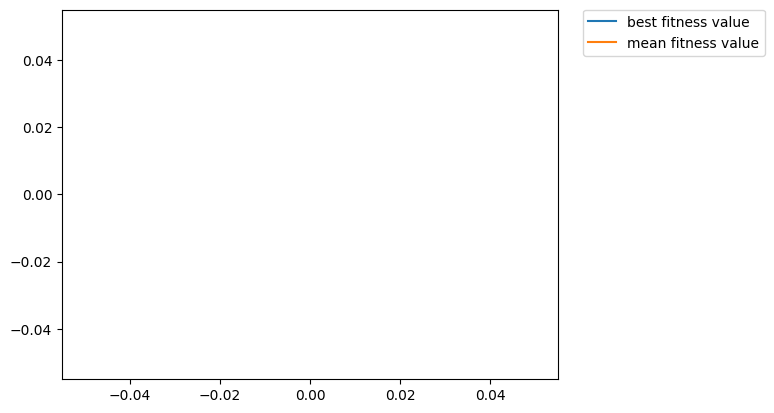

Experiment Id: grover_3qubits_78bbbba7-2c6c-4b9f-85b0-bd648f8ac2c7
	2024-04-02 17:32:54.348255 - 2024-04-02 17:32:54.348255


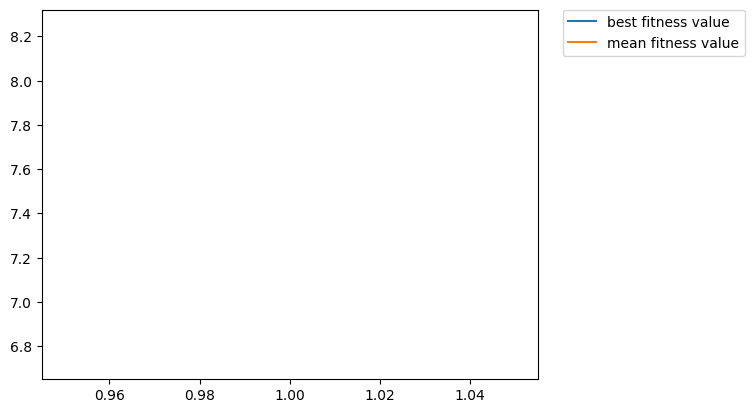

Experiment Id: grover_3qubits_d4c0b6cf-f5d2-4f0d-81ef-794f86aba12e
	2024-04-02 17:37:37.473830 - 2024-04-03 07:51:59.781855


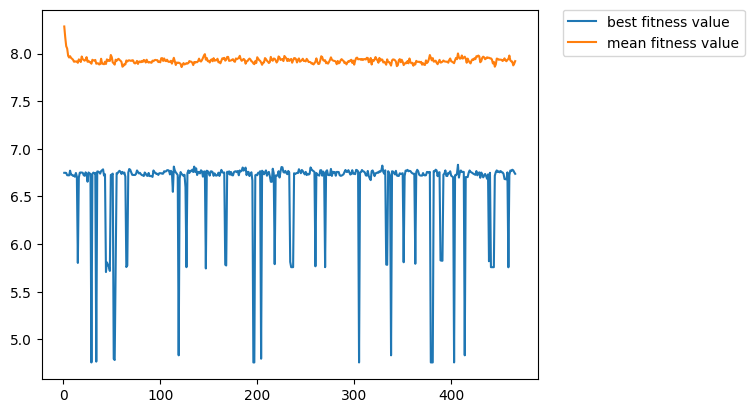

Experiment Id: grover_3qubits_1278748f-ef11-41c7-b36d-a7626232283a
	2024-04-03 07:54:53.112540 - 2024-04-03 13:52:37.855337


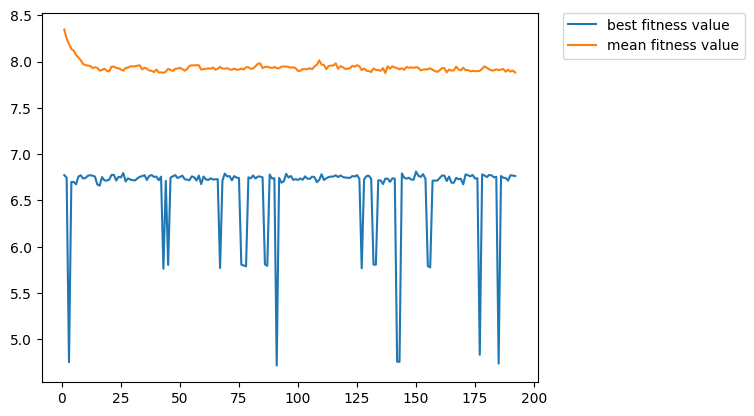

Experiment Id: grover_3qubits_ff3c8f7b-e318-4979-9957-4fce191dec61
	2024-04-03 13:56:35.803638 - 2024-04-03 14:24:28.675780


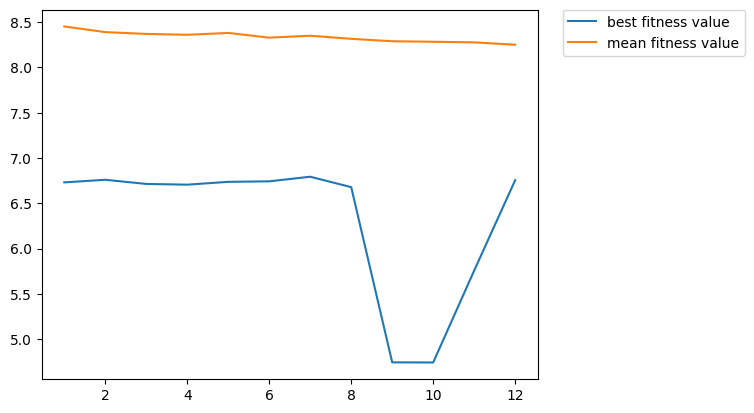

Experiment Id: grover_3qubits_4fdc1eaa-a99f-4e9c-8150-035ae31edc98
	2024-04-03 15:14:47.759100 - 2024-04-04 14:16:14.502241


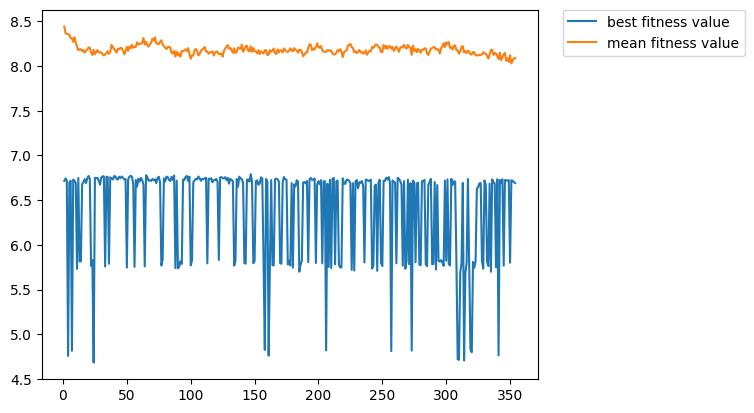

Experiment Id: grover_3qubits_94ec789c-f5ef-44b3-b5ee-898468f8d669
	2024-04-04 14:24:30.161253 - 2024-04-04 16:55:11.941908


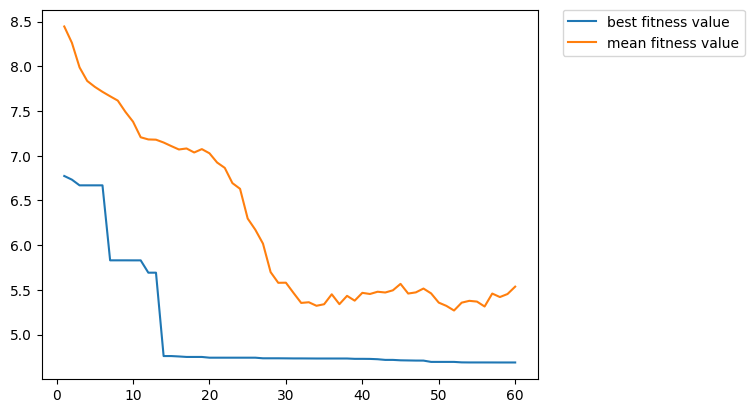

In [52]:
from matplotlib import pyplot as plt

experiment_ids = experiments["experiment_id"].unique()

for experiment_id in experiment_ids:
    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
 
    ax = plt.subplot()
    ax.plot(current_fitness_values["generation"], current_fitness_values["best_fitness_value"])
    ax.plot(current_fitness_values["generation"], current_fitness_values["mean_fitness_value"])
    
    print(f"Experiment Id: {experiment_id}")
    print(f"\t{current_fitness_values['created_at'].min()} - {current_fitness_values['created_at'].max()}")
    
    plt.legend(["best fitness value", "mean fitness value"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

## Visualize Fitness Value Changes Accross Experiments

Development of best fitness values:


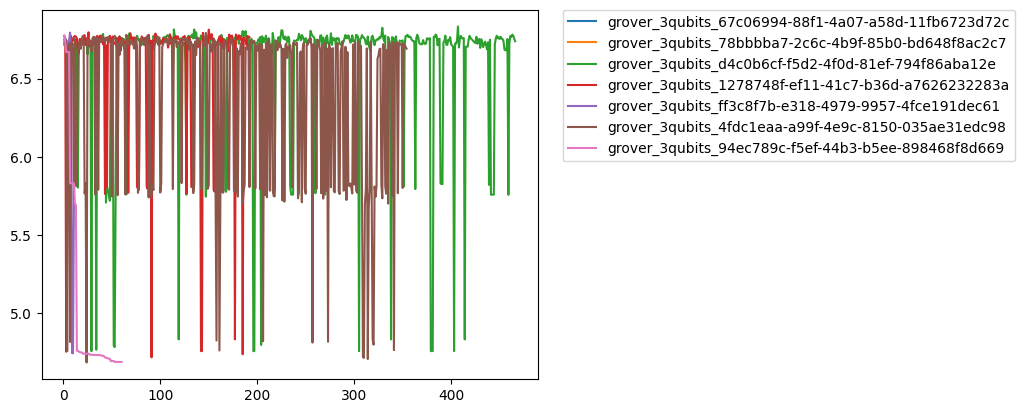

In [51]:
experiment_ids = experiments["experiment_id"].unique()

ax = plt.subplot()

for experiment_id in experiment_ids:
    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]
    
    ax.plot(current_fitness_values["generation"], current_fitness_values["best_fitness_value"])

print("Development of best fitness values:")
plt.legend(experiment_ids, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Development of mean fitness values:


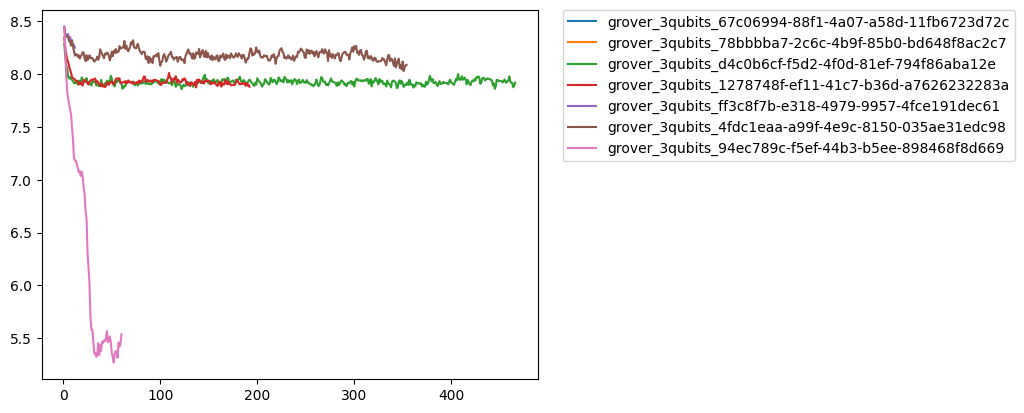

In [50]:
experiment_ids = experiments["experiment_id"].unique()

ax = plt.subplot()

for experiment_id in experiment_ids:
    current_fitness_values = fitness_values.loc[fitness_values["experiment_id"] == experiment_id]

    ax.plot(current_fitness_values["generation"], current_fitness_values["mean_fitness_value"])

print("Development of mean fitness values:")
plt.legend(experiment_ids, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()